In [3]:
import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

# Request data goes here
# The example below assumes JSON formatting which may be updated
# depending on the format your endpoint expects.
# More information can be found here:
# https://docs.microsoft.com/azure/machine-learning/how-to-deploy-advanced-entry-script
data = {
  "Inputs": {
    "data": {
      "make": ["Toyota"],
      "model": ["Corolla"],
      "fuel": ["Gasolina"],
      "year": [2020],
      "kms": [30000],
      "power": [132],
      "transmission": ["automatic"]
    }
  },
  "GlobalParameters": 1.0
}

body = str.encode(json.dumps(data))

url = 'http://c46f109b-f399-4a88-a0b5-70030985f904.eastus2.azurecontainer.io/score'
# Replace this with the primary/secondary key, AMLToken, or Microsoft Entra ID token for the endpoint
api_key = 'uwwIMT6N69MOvr2GatGBtXMbwKPPOG1U'
if not api_key:
    raise Exception("A key should be provided to invoke the endpoint")


headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    result_json = json.loads(result)
    result_value = result_json["Results"][0]
    print(int(result_value))
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(error.read().decode("utf8", 'ignore'))

23094


# EXPLICACIÓN

#### PASOS

- 1: Establecer endpoint
- 2: Descargar código de la API y la API Key
- 3: Donde la descripción del mejor modelo veremos una pestaña que pone descargar, clicamos a descargar y obtendremos un zip con varios archivos. El importante es el scoring.py, es el que nos dirá en que formato pasarle el los inputs de data. 
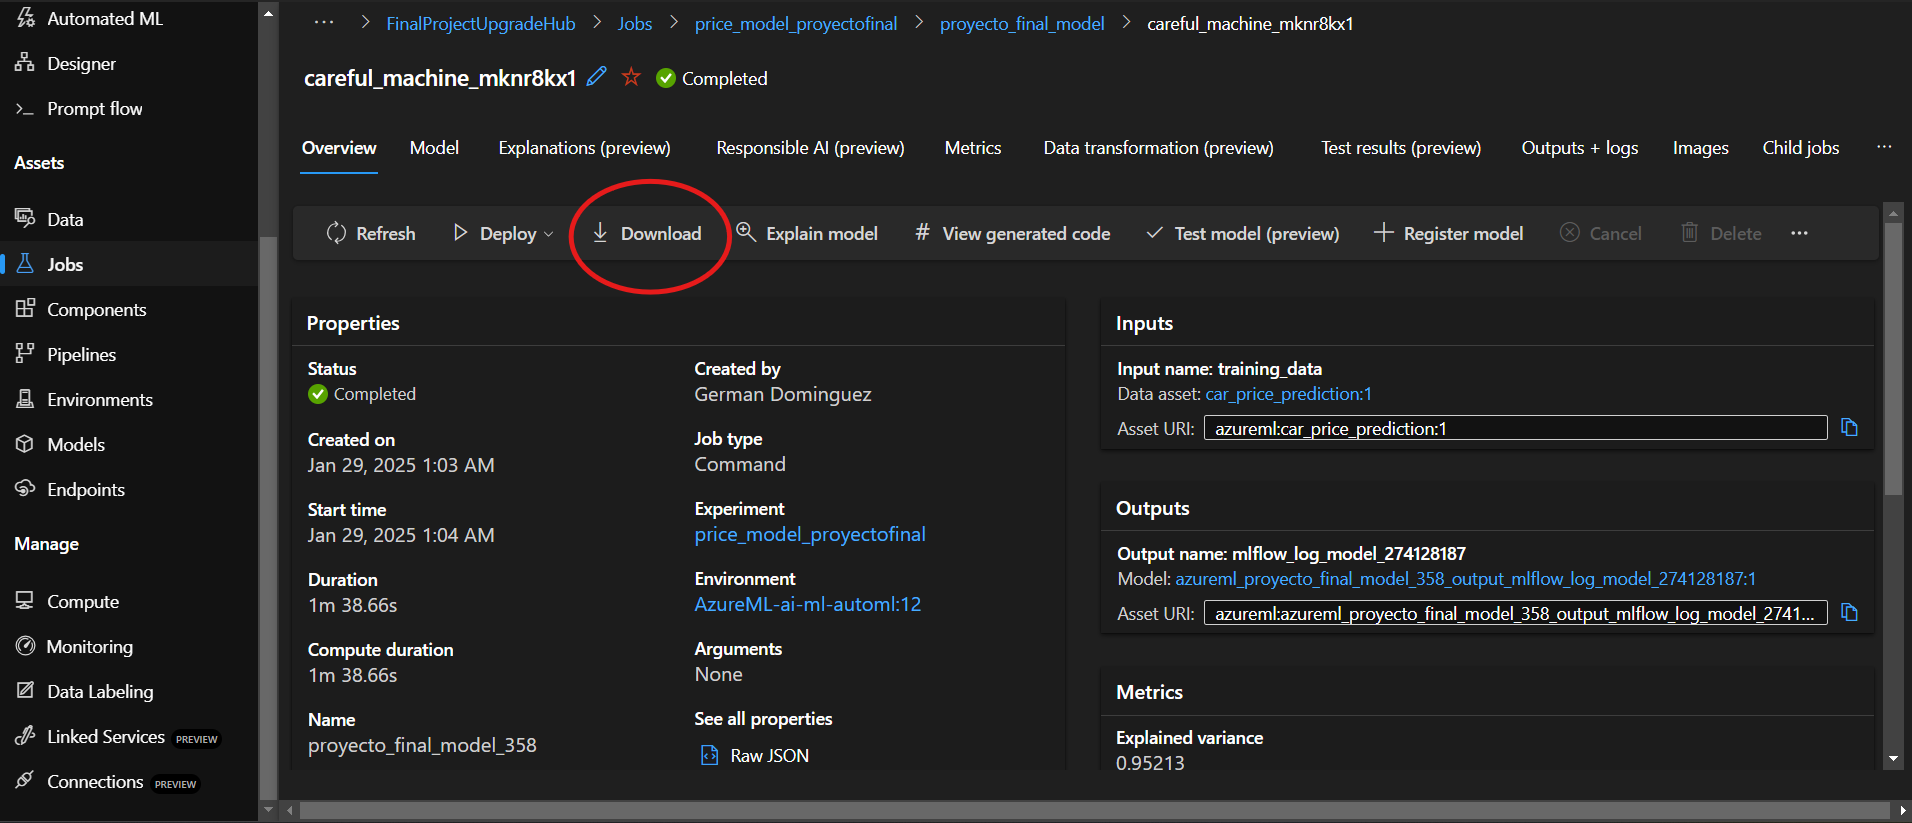

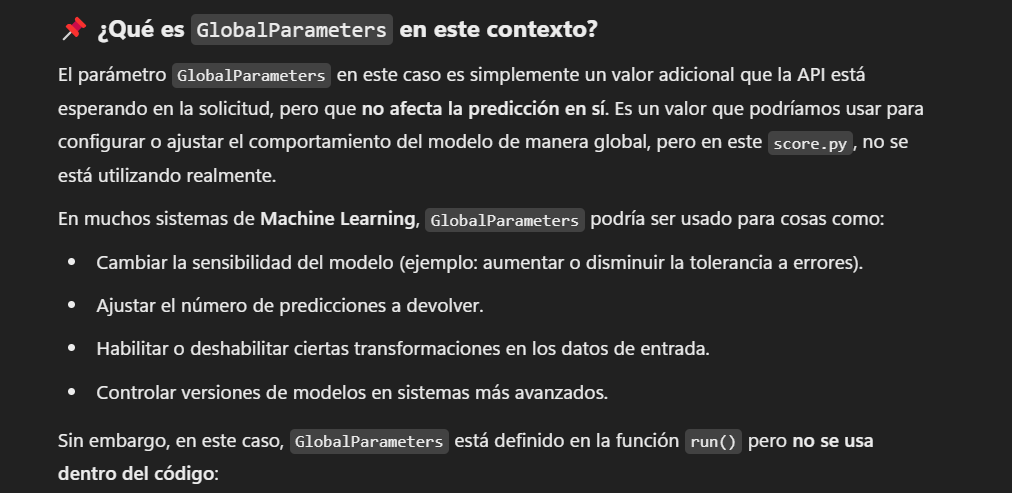

In [ ]:
'''def run(Inputs, GlobalParameters=1.0):
    data = Inputs['data']
    result = model.predict(data)
    return {'Results': result.tolist()}'''


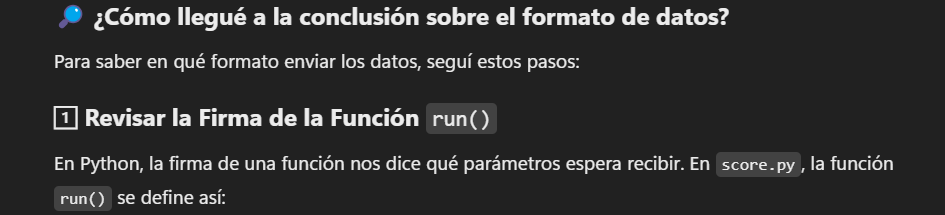

In [4]:
#def run(Inputs, GlobalParameters=1.0):


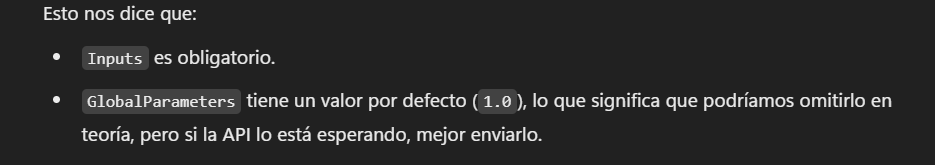

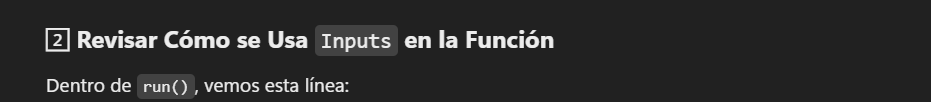

In [5]:
# data = Inputs['data']


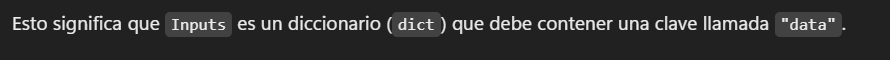

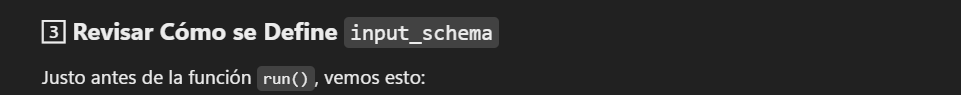

In [ ]:
'''@input_schema('Inputs', input_sample)
@input_schema('GlobalParameters', sample_global_parameters, convert_to_provided_type=False)
'''

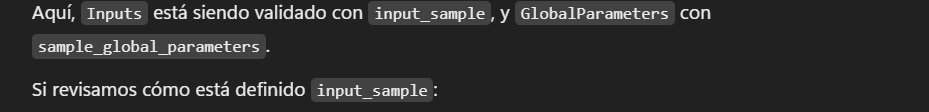

In [6]:
#input_sample = StandardPythonParameterType({'data': data_sample})


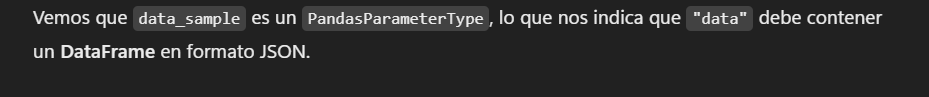

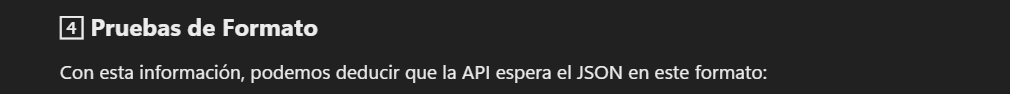

In [ ]:
'''{
  "Inputs": {
    "data": {
      "make": ["Toyota"],
      "model": ["Corolla"],
      "fuel": ["Gasoline"],
      "year": [2020],
      "kms": [30000],
      "power": [132],
      "transmission": ["Automatic"]
    }
  },
  "GlobalParameters": 1.0
}
'''

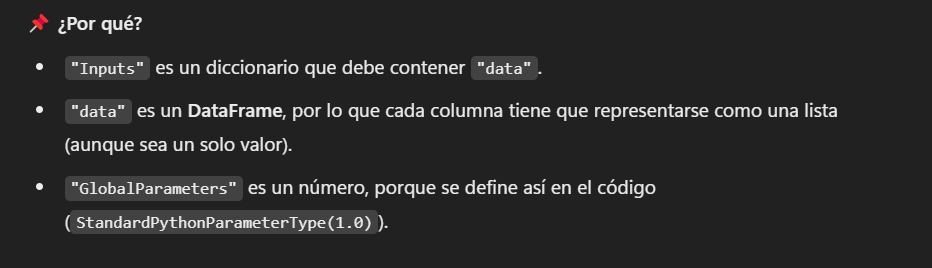

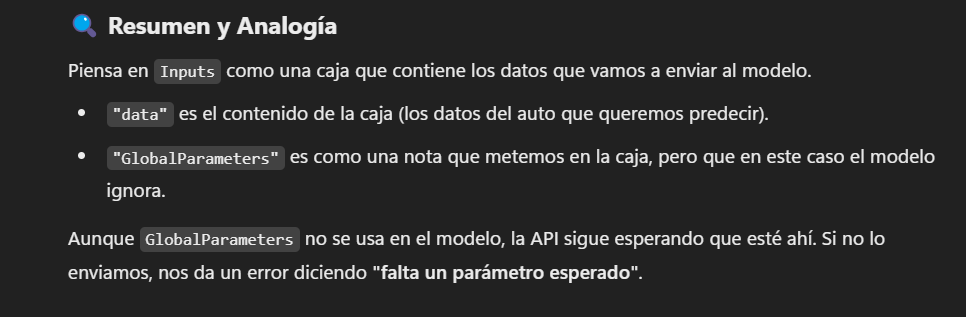

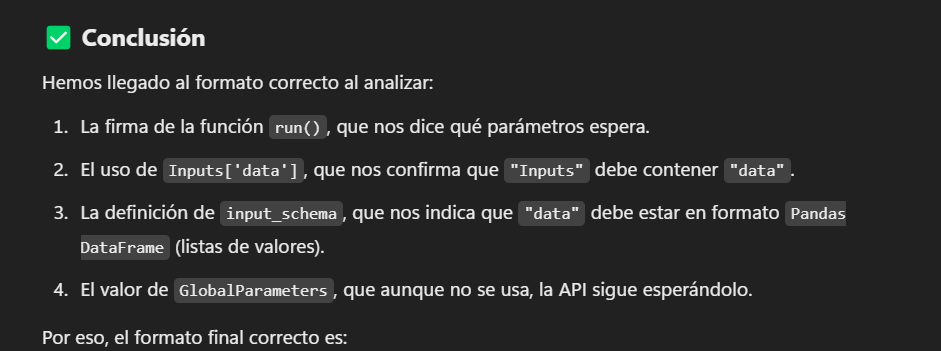

In [ ]:
'''{
  "Inputs": {
    "data": {
      "make": ["Toyota"],
      "model": ["Corolla"],
      "fuel": ["Gasoline"],
      "year": [2020],
      "kms": [30000],
      "power": [132],
      "transmission": ["Automatic"]
    }
  },
  "GlobalParameters": 1.0
}
'''